# THE SPARKS FOUNDATION

## Prediction using Unsupervised ML

## TASK #2: Predict the optimum number of clusters and represent it visually.

### AUTHOR: KUNAL MEHTA

#### Importing all the necessary libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [57]:
print("\033[1mFirst 5 rows of the dataset\033[0;0m")

data.head()

First 5 rows of the dataset


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
print("\033[1m Checking for null values in the dataset\033[0;0m")

data.isnull().sum()


 Checking for null values in the dataset


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [61]:
print("\033[1mChecking the Correlation between variables\033[0;0m")

data.corr()

Checking the Correlation between variables


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [62]:
print("\033[1mChecking the summary statistics of the data\033[0;0m")

data.describe()

Checking the summary statistics of the data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [64]:
print("\033[1mChecking basic information of the dataset\033[0;0m")
print()
data.info()

Checking basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [65]:
print("\033[1mChecking column headers of the dataset\033[0;0m")

data.columns

Checking column headers of the dataset


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Finding Optimum number of clusters for KMeans classifier using Elbow Method


In [12]:
cluster = data.iloc[:, [0, 1, 2, 3]].values

In [14]:
scaler = MinMaxScaler()
cluster_scale = scaler.fit_transform(cluster)

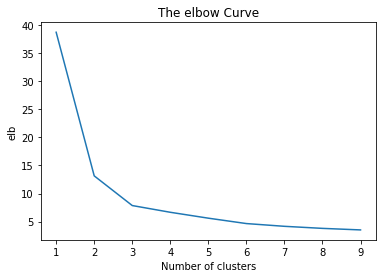

In [31]:
elb = []
for num_clusters in range(1, 10):
    model_clus = KMeans(n_clusters = num_clusters)
    model_clus.fit(cluster_scale)
    elb.append(model_clus.inertia_)
    
plt.plot(range(1, 10), elb)
plt.title('The elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('elb') 
plt.show()

## Explainaition of the above generate plot.

* We are plotting the graph of ‘value of k’ on x-axis and ‘value of Epsilon’ on y-axis, and there is an elbow formation at the optimum value of ‘k’.


* We are visually determining the best value for k. The line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k.


## What is Elbow Curve and how it is useful in the KMean process?


* ### The Elbow Method is one of the most popular methods to determine the optimal value of k.


* It basically looks at the inertia. Inertia represents the distance from a data point from it clusters centre. So, as the number of clustering increases, the inertia will keep decreasing, so in an extreme case, if every point is a cluster. Then the inertia value is zero, because the point itself is the centre.


* The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.


*  The intuition behind the Elbow curve is that the explained variation changes rapidly until the number of groups you have in the data and then it slows down leading to an elbow formation in the graph as shown above. The Elbow point is the number of clusters you should use for your K-Means algorithm.


*  This method is to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. 


*  The method is useful in the KMean process as it helps to determine the number of clusters we want to divide the data points into i.e. the value of K has to be pre-determined. 


* Here, elbow is formed at point number 3. Hence, we can select number of clusters as 3 based on this method.

### Visualization presentation of Clustering

In [36]:
k_cluster=KMeans(n_clusters=3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
clus_kmeans = k_cluster.fit_predict(cluster)

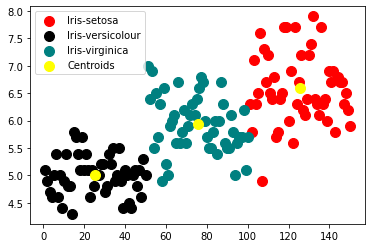

In [55]:
plt.scatter(cluster[clus_kmeans == 0, 0], cluster[clus_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(cluster[clus_kmeans == 1, 0], cluster[clus_kmeans == 1, 1], 
            s = 100, c = 'black', label = 'Iris-versicolour')
plt.scatter(cluster[clus_kmeans == 2, 0], cluster[clus_kmeans == 2, 1],
            s = 100, c = 'teal', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()